/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_30109/943359362.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/user/Downloads/Dashboard _ PlaymakerAI.csv')


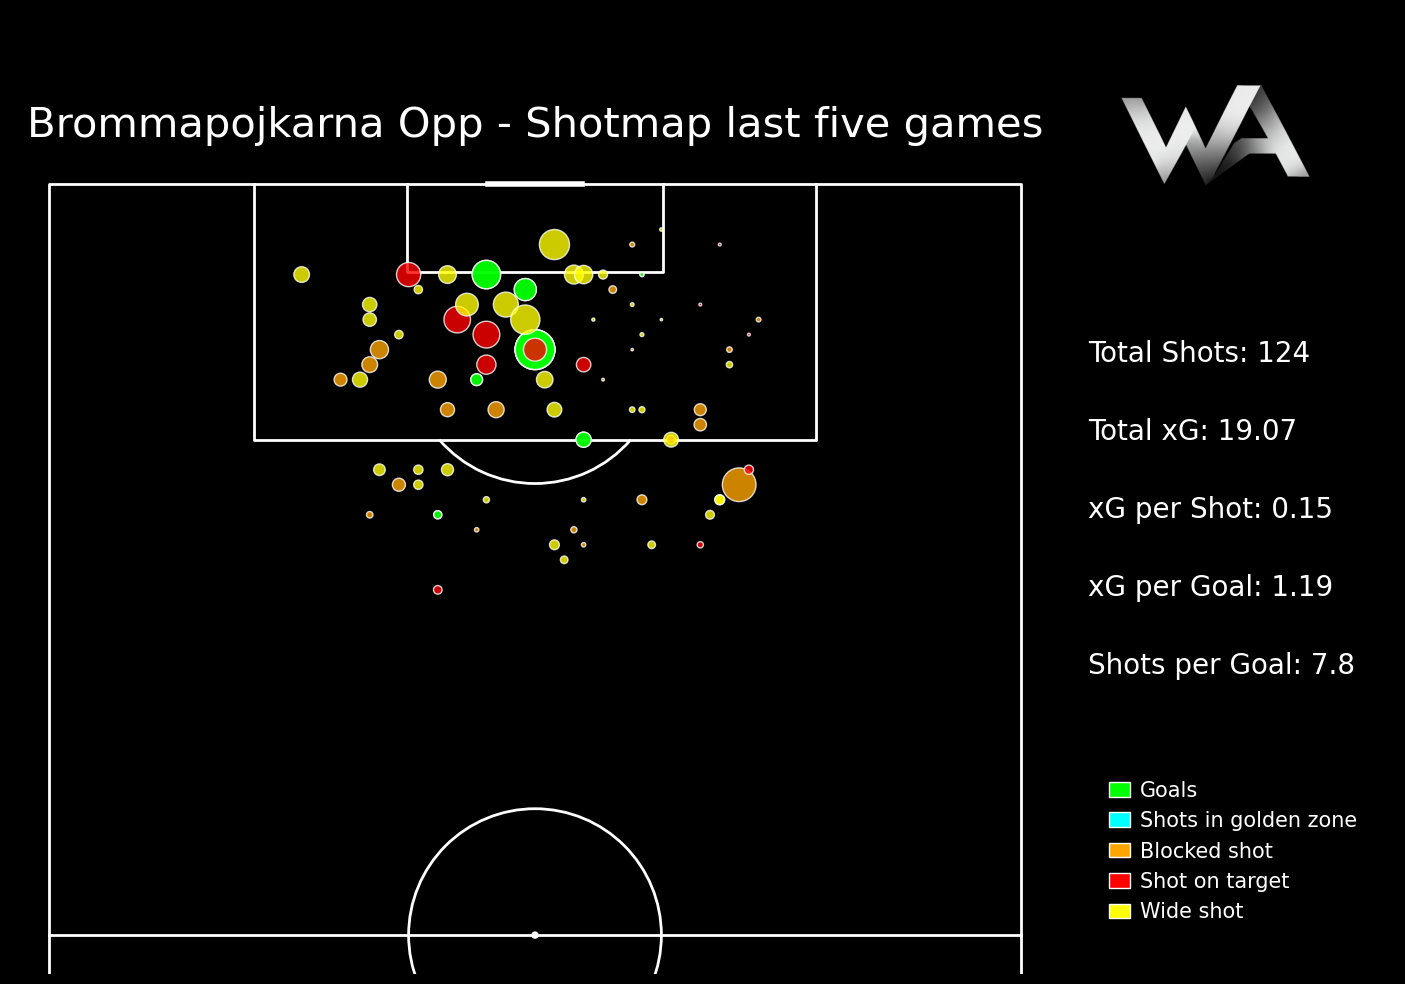

In [2]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/user/Downloads/Dashboard _ PlaymakerAI.csv')

# Fix xG: convert '0,1' → 0.1
df['xG'] = df['xG'].astype(str).str.replace(',', '.')
df['xG'] = pd.to_numeric(df['xG'], errors='coerce')

# Filter for Brommapojkarna and relevant shot actions
shot_actions = [
    "Goals", 
    "Shots in GZ", 
    "Blocked shot", 
    "Shot on target", 
    "Wide shot"
]
df = df[df['opponent'] == 'Brommapojkarna']
df_filtered = df[df['action'].isin(shot_actions)]

# Drop rows with missing data needed for plotting
df_filtered = df_filtered.dropna(subset=['xpos', 'ypos', 'xG'])

# Count and calculate key stats
total_shots = len(df_filtered)
total_xg = df_filtered['xG'].sum()
goals = len(df_filtered[df_filtered['action'] == 'Goals'])

xg_per_shot = total_xg / total_shots if total_shots else 0
xg_per_goal = total_xg / goals if goals else 0
shots_per_goal = total_shots / goals if goals else 0

# Assign colors
action_colors = {
    "Goals": "lime",
    "Shots in golden zone": "cyan",
    "Blocked shot": "orange",
    "Shot on target": "red",
    "Wide shot": "yellow"
}

# Create figure with space on right
fig = plt.figure(figsize=(14, 10), facecolor='black')
ax = fig.add_axes([0.0, 0.05, 0.75, 0.9])

# Pitch
pitch = VerticalPitch(
    half=True,
    pitch_type='opta',
    pitch_color='black',
    line_color='white'
)
pitch.draw(ax=ax)
ax.set_title('Brommapojkarna Opp - Shotmap last five games', fontsize=30, color='white')

# Scatter plot
for action, color in action_colors.items():
    action_df = df_filtered[df_filtered['action'] == action]
    pitch.scatter(
        action_df['xpos'], 
        action_df['ypos'], 
        s=action_df['xG'] * 1000,
        ax=ax,
        color=color,
        edgecolors='white',
        alpha=0.8,
        label=action
    )

# Custom legend
legend_elements = [
    mpatches.Circle((0, 0), radius=6, color=color, label=label, ec='white')
    for label, color in action_colors.items()
]

# Logo
logo_path = '/Users/user/Downloads/wa2.png'
logo_img = mpimg.imread(logo_path)
logo_ax = fig.add_axes([0.7, 0.8, 0.25, 0.25], anchor='NE', zorder=1)
logo_ax.imshow(logo_img)
logo_ax.axis('off')

# Text panel with advanced stats
text_lines = [
    f'Total Shots: {total_shots}',
    f'Total xG: {total_xg:.2f}',
    f'xG per Shot: {xg_per_shot:.2f}',
    f'xG per Goal: {xg_per_goal:.2f}' if goals else 'xG per Goal: N/A',
    f'Shots per Goal: {shots_per_goal:.1f}' if goals else 'Shots per Goal: N/A',
    ''
]

# Combine all lines with newlines
stats_text = '\n\n'.join(text_lines)

# Render multiline text
fig.text(
    0.77, 0.72,
    stats_text,
    color='white',
    fontsize=20,
    ha='left',
    va='top',
    linespacing=1.5  # Optional: controls spacing between lines
)


# Legend below text
legend_ax = fig.add_axes([0.77, 0.1, 0.22, 0.2], frameon=False)
legend_ax.axis('off')
legend_ax.legend(
    handles=legend_elements,
    loc='upper left',
    frameon=False,
    labelcolor='white',
    handlelength=1,
    handletextpad=0.5,
    fontsize=15,
    borderpad=0.5
)

# Save and show
fig.savefig('/Users/user/Downloads/brommapojkarna_shots_opp.png', dpi=300, facecolor='black')
plt.show()
